In [1]:
from utils import get_all_data, read_dataset, mean_square_error,generateSinData
from gp import GaussianProcess, SparseGaussianProcess
from kernels import ARDKernel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
domain = np.linspace(-2.5*np.pi, 2.5*np.pi, 100)
Xdomain = np.matrix([[point,np.random.randn(1)] for point in domain])
X,Y = generateSinData(50)
# shuffeling the input
indices = np.arange(len(Y))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

In [87]:
sgp = SparseGaussianProcess(X,Y,5)
fullgp = GaussianProcess(X,Y) 

In [88]:
spred= sgp.getPosteriorPredictive()
fpred= fullgp.getPosteriorPredictive()

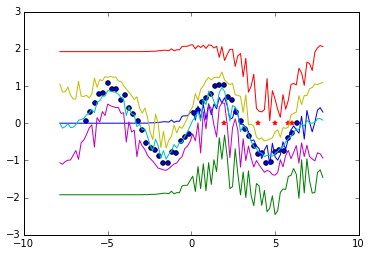

In [93]:
smu = []
var = []
smuf = []
varf = []
for x in Xdomain:
    m, cv = spred(x)
    mf, cvf = fpred(x)
    smu.append(m[0][0])
    var.append(np.sqrt(cv[0][0]))
    smuf.append(mf[0][0])
    varf.append(np.sqrt(cvf[0][0]))
smu = np.array(smu)
var = np.array(var)
smuf = np.array(smuf)
varf = np.array(varf)
plt.plot(Xdomain[:,0],smu)
plt.plot(Xdomain[:,0],smu-var)
plt.plot(Xdomain[:,0],smu+var)
plt.plot(Xdomain[:,0],smuf)
plt.plot(Xdomain[:,0],smuf-varf)
plt.plot(Xdomain[:,0],smuf+varf)
plt.scatter(sgp.pseudo_points.eval()[:,0],np.zeros(sgp.M),color="red",marker="*")
plt.scatter(X[:,0],Y)

In [90]:
cost = []
rms = sgp.RMSprop()
fcost = []
frms = fullgp.RMSprop()

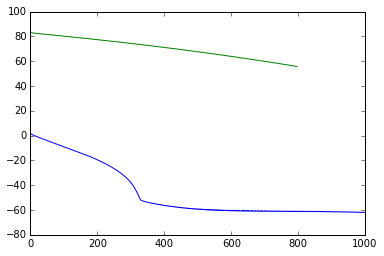

In [81]:
for i in range(1000):
    cost.append(rms())
    fcost.append(frms())
plt.plot(cost)
plt.plot(fcost)

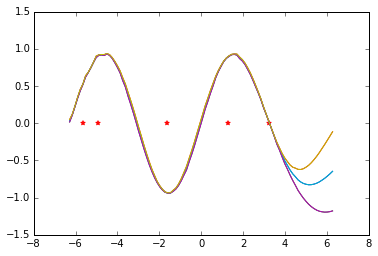

In [82]:
smu = []
var = []
smuf = []
varf = []
for x in Xdomain:
    m, cv = spred(x)
    mf, cvf = spred(x)
    smu.append(m[0][0])
    var.append(cv[0][0])
    smuf.append(mf[0][0])
    varf.append(cvf[0][0])
smu = np.array(smu)
var = np.array(var)
smuf = np.array(smuf)
varf = np.array(varf)
plt.plot(Xdomain[:,0],smu)
plt.plot(Xdomain[:,0],smu-var)
plt.plot(Xdomain[:,0],smu+var)
plt.plot(Xdomain[:,0],smuf)
plt.plot(Xdomain[:,0],smuf-varf)
plt.plot(Xdomain[:,0],smuf+varf)
plt.scatter(sgp.pseudo_points.eval()[:,0],np.zeros(sgp.M),color="red",marker="*")

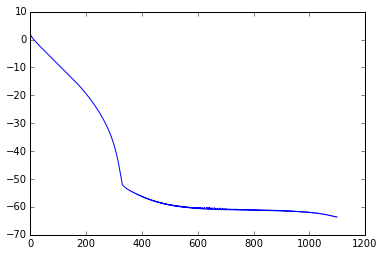

In [83]:
for i in range(100):
    cost.append(rms())
plt.plot(cost)

In [60]:
fpred= fullgp.getPosteriorPredictive()

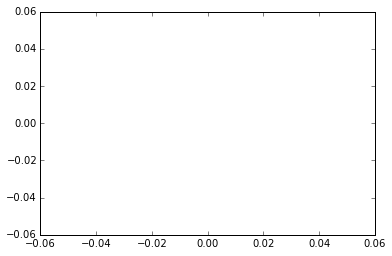

In [61]:
smu = []
var = []
for x in Xdomain:
    m, cv = fpred(x)
    smu.append(m[0][0])
    var.append(cv[0][0])
smu = np.array(smu)
var = np.array(var)
plt.plot(Xdomain[:,0],smu)
plt.plot(Xdomain[:,0],smu-var)
plt.plot(Xdomain[:,0],smu+var)

In [37]:
samples = np.random.multivariate_normal(mu.T[0],covar,20)

ValueError: array must not contain infs or NaNs

In [38]:
plt.plot(samples.T)

NameError: name 'samples' is not defined